In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import PurePath
from json import load

In [32]:
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 26
CHONK_SIZE = 32
font = {'family' : 'DIN Condensed',
        'weight' : 'bold',
        'size'   : SMALL_SIZE}
plt.rc('font', **font)
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE, facecolor="xkcd:white")
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=CHONK_SIZE, facecolor="xkcd:white", edgecolor="xkcd:black") #  powder blue

In [33]:
def calc_model_performance(tpr, fpr, thresholds):
    performance_dict = {}
    
    # calculating auc
    performance_dict["AUC"] = np.trapz(y = tpr, x = fpr)
    
    # calculating eer
    tnr = 1 - np.array(tpr)
    scores = np.array((tnr, fpr)).T
    diffs = np.absolute(scores[:, 0] - scores[:, 1])
    min_index = np.argmin(diffs)
    lowest_threshold = thresholds[min_index]
    eer = (tnr[min_index] + fpr[min_index]) / 2
    performance_dict["EER"] = eer
    performance_dict["Threshold"] = lowest_threshold

    return performance_dict

In [34]:

def plot_ROC_curve(tpr, fpr, thresholds, performance, model_name, output_folder):
    fig, ax = plt.subplots()
    ax.fill_between(fpr, tpr)
    sns.scatterplot(x = fpr, y = tpr, ax = ax)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

    v, h = .1, .1
    ax.set_xlim(0-h, 1+h)
    ax.set_ylim(0-v, 1+v)

    # Loop through the data points 
    for i, threshold in enumerate (thresholds):
        plt.text(fpr[i], tpr[i], threshold)

    vals = [i for i in np.arange(0, 1, 0.01)]
    xp = [i for i in np.arange(1, 0, -0.01)]
    sns.lineplot(x = vals, y = vals, ax = ax, color = "red")
    sns.lineplot(x = vals, y = xp, ax = ax, color = "green")
    fig.suptitle(f"ROC Curve: {model_name}")
    fig.set_size_inches(10, 7)
    start = .2
    gap = .2
    height = 1.05
    plt.text(start, height, f"EER: {round(performance['EER'] * 100, 1)}%")
    plt.text(start + gap, height, f"Threshold: {round(performance['Threshold'], 3)}")
    plt.text(start + 2*gap + 0.05, height, f"AUC: {round(performance['AUC'], 3)}")

    plt.savefig(f"{output_folder}{model_name}.png", dpi = 400)

    pass

In [35]:
read_path = PurePath("/Users/joshuaelms/Desktop/github_repos/nsf-reu2022/data/simulation_results/tpr_fpr_Scaled_Manhattan.json")
with open(read_path, "r") as f:
    data = load(f)

In [36]:
t_start, t_stop, t_step = 0, 80, 2
thresholds = [i for i in np.arange(t_start, t_stop, t_step)]
aggregate_data = {str(threshold): {"tpr": [], "fpr": []} for threshold in thresholds}
for user in data:
    for threshold in thresholds:
        threshold = str(threshold)
        tpr, fpr = data[user][threshold]["tpr"], data[user][threshold]["fpr"]
        if tpr != None:
            aggregate_data[threshold]["tpr"].append(tpr)

        if fpr != None: 
            aggregate_data[threshold]["fpr"].append(fpr)

In [37]:
for threshold in aggregate_data:
    aggregate_data[threshold]["tpr"] = np.array(aggregate_data[threshold]["tpr"]).mean(axis = 0)
    aggregate_data[threshold]["fpr"] = np.array(aggregate_data[threshold]["fpr"]).mean(axis = 0)

In [38]:
aggregate_data

{'0': {'tpr': 0.02265508150994299, 'fpr': 0.0005193686725768867},
 '2': {'tpr': 0.03764663269626674, 'fpr': 0.005302484427710924},
 '4': {'tpr': 0.11894510512793377, 'fpr': 0.0370613995879471},
 '6': {'tpr': 0.22718201495692883, 'fpr': 0.09568664412017187},
 '8': {'tpr': 0.3261341267364136, 'fpr': 0.1647140685029899},
 '10': {'tpr': 0.4159367069709008, 'fpr': 0.23179790575954934},
 '12': {'tpr': 0.4726903124752264, 'fpr': 0.2907027184005863},
 '14': {'tpr': 0.5285317249164827, 'fpr': 0.34733996458944455},
 '16': {'tpr': 0.5677202735789746, 'fpr': 0.3928738857306153},
 '18': {'tpr': 0.5999957632897623, 'fpr': 0.4317859783636828},
 '20': {'tpr': 0.6295100339030538, 'fpr': 0.4693136194664983},
 '22': {'tpr': 0.6541785663149277, 'fpr': 0.5029705203589846},
 '24': {'tpr': 0.6744102661773628, 'fpr': 0.5297248604282846},
 '26': {'tpr': 0.6888758501214003, 'fpr': 0.5524713991522789},
 '28': {'tpr': 0.7036174320734458, 'fpr': 0.5734829108601216},
 '30': {'tpr': 0.7134427587335368, 'fpr': 0.5941

In [39]:
tpr = []
fpr = []

for key, value in aggregate_data.items():
    tpr.append(value["tpr"])
    fpr.append(value["fpr"])

In [40]:
performance = calc_model_performance(tpr, fpr, thresholds)

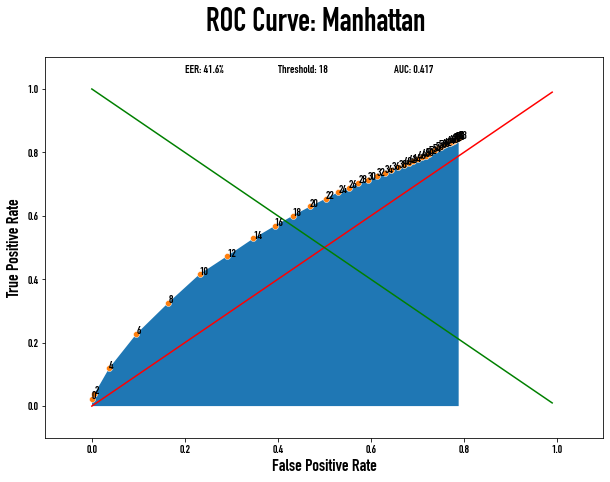

In [41]:
plot_ROC_curve(tpr, fpr, thresholds, performance, "Manhattan", "/Users/joshuaelms/Desktop/github_repos/nsf-reu2022/continuous_authentication/simulation/")